<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li> Use yfinance to Extract Stock Data</li>
        <li> Use Webscraping to Extract Tesla Revenue Data</li>
        <li> Use yfinance to Extract Stock Data</li>
        <li> Use Webscraping to Extract GME Revenue Data</li>
        <li> Plot Tesla Stock Graph</li>
        <li> Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @ 

In [53]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

brew install pandoc


SyntaxError: invalid syntax (3980437464.py, line 8)

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [44]:
def make_graph(stock_data, revenue_data, stock):
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']) # Convert Date column to datetime format
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']  # Corrected the date typo
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


## Use yfinance to Extract Stock Data


In [8]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [9]:
tesla_data = tesla.history(period="max")

In [10]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


##  Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
import requests

# Send a GET request to the URL
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print("Failed to retrieve the webpage.")



Parse the html data using `beautiful_soup`.


In [15]:

from bs4 import BeautifulSoup

# Parse the html content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [20]:
tesla_revenue = pd.read_html(html_data)[0]
tesla_revenue.columns = ["Date", "Revenue"]


In [21]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [22]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [23]:
print(tesla_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


##  Use yfinance to Extract Stock Data


In [26]:
GameStop = yf.Ticker("GME")

In [27]:
GameStop_data = GameStop.history(period="max")

In [28]:
GameStop_data.reset_index(inplace = True)
GameStop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


##  Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [29]:
import requests

# Send a GET request to the URL
response1 = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

# Check if the request was successful
if response1.status_code == 200:
    html_data = response1.text
else:
    print("Failed to retrieve the webpage.")



Parse the html data using `beautiful_soup`.


In [35]:
from bs4 import BeautifulSoup

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')




In [31]:
GameStop_revenue = pd.read_html(html_data)[0]
GameStop_revenue.columns = ["Date", "Revenue"]


In [32]:
print(GameStop_revenue.tail())


    Date Revenue
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


##  Plot Tesla Stock Graph


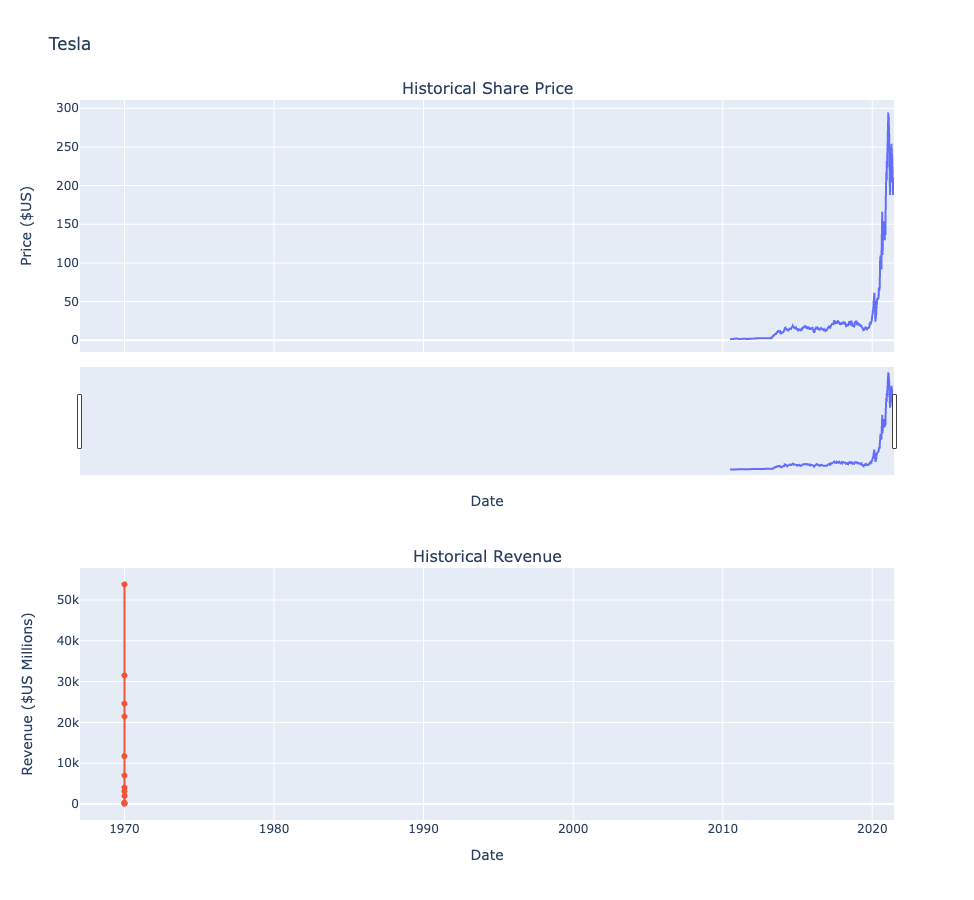

In [45]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [51]:
GameStop_revenue.Revenue = GameStop_revenue.Revenue.replace('[\$,]', '', regex=True).astype(float)


##  Plot GameStop Stock Graph


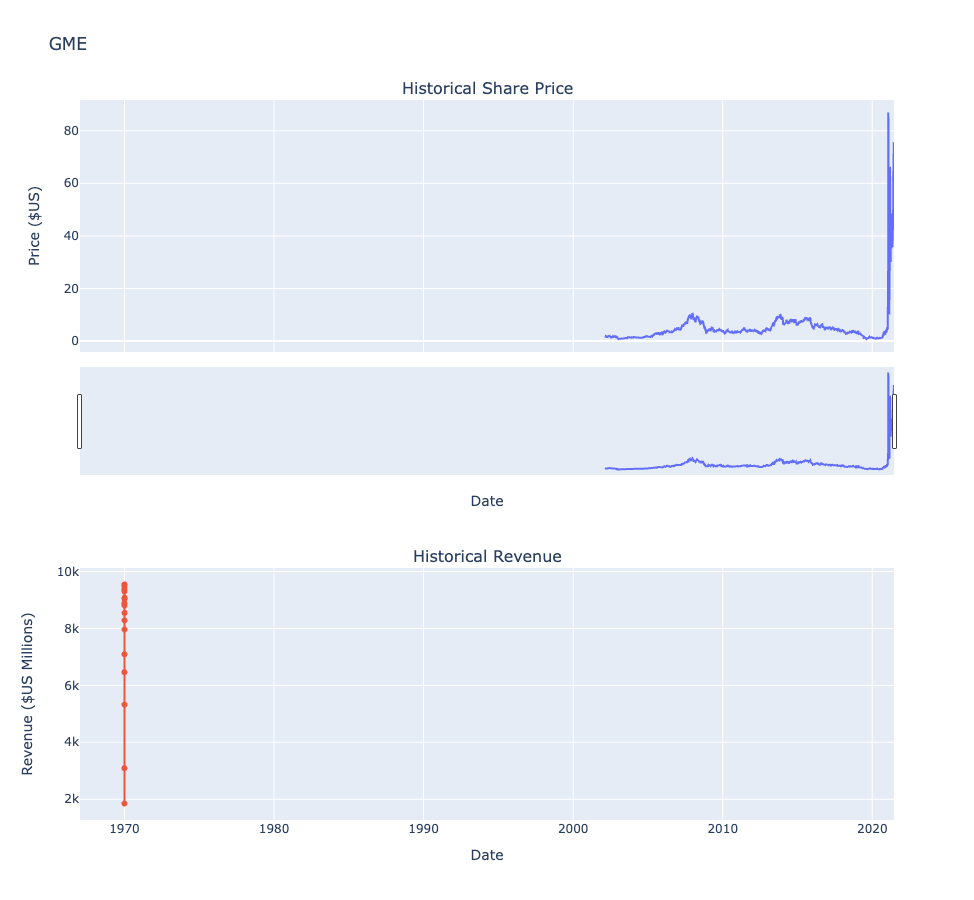

In [52]:

make_graph(GameStop_data, GameStop_revenue, 'GME')
